# XGBOOST - SCORING

In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
from datetime import date
from sklearn import preprocessing
import xgboost as xgb
import pickle

### GLOBAL VARIABLES

In [4]:
DATAPATH = 'data/features/'
SEED = 47
NITER = 100
CV = 3
SCORE = 'balanced_accuracy'
handlingnull = False
NJOBS = 7
USEGPU = True
NCLASS = 3 # number class to predict (if bivar set 0)

### LOAD DATASET

In [5]:
# Load submission Data
submission = np.load(DATAPATH+'submission_002.npy')

In [6]:
submission.shape

(1551, 1273)

In [7]:
submission = xgb.DMatrix(submission)

In [8]:
file_names = pd.read_csv('data/raw/test_files.csv')

### LOAD MODEL

In [9]:
# init model
if USEGPU:
    xgb_model = xgb.Booster({'nthread': 4, 'tree_method':'gpu_hist', 'gpu_id':0})
else:
    xgb_model = xgb.Booster({'nthread': 4})  
    
xgb_model.load_model('models/xgb_002.model')  # load data

### SCORING

In [10]:
y_pred = xgb_model.predict(submission)

In [11]:
y_pred = np.argmax(y_pred,axis=1)

### SUBMIT

In [15]:
ds = pd.DataFrame({'file' : file_names.filename, 'prediction' : y_pred})
ds.to_csv("submits/submit_008.csv", index=False, header=None)

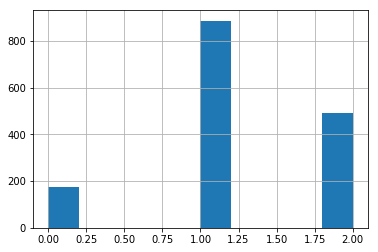

In [14]:
ds['prediction'].hist()
pass